<a href="https://colab.research.google.com/github/billy90834/ML/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 新增區段

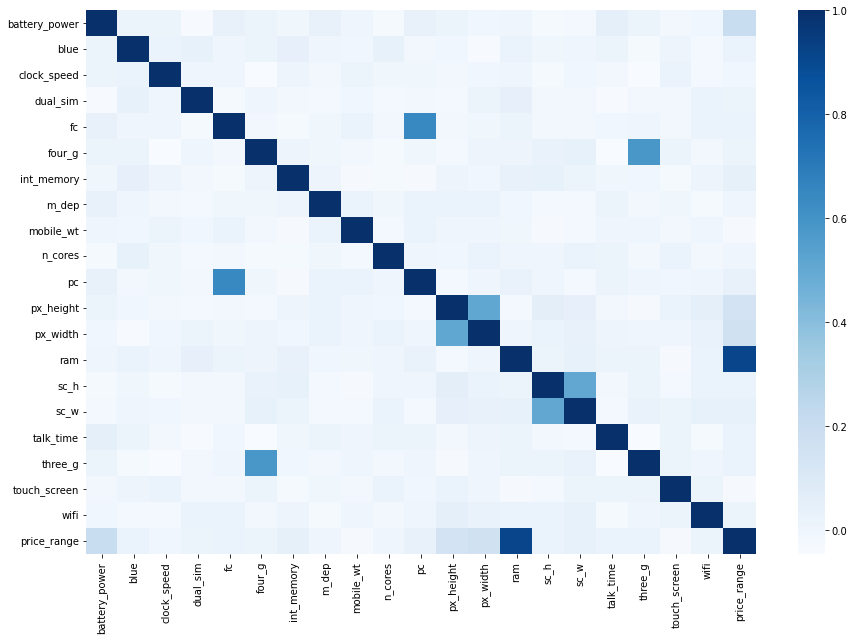

In [ ]:
#檔案讀取
data = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
test.drop(columns='id', axis=1, inplace=True)
#heatmap for correlation
corr = data.corr()
corr['price_range'].sort_values(ascending=False)
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cbar=True, cmap='Blues')
plt.show()


In [ ]:
test.head()  #顯示前五筆資料

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')  #Read the train dataset
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')  #Read the test dataset

#看dataset size
print(train.shape) 
print(test.shape)
print(train.columns.difference(test.columns))  #找train和test不同項

#Divide the dataset into X and y
X = train.drop('price_range', axis=1)
y = train['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #split into train and test set
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)
sc = StandardScaler()


#SVM CLASSIFICATION
svc = SVC(kernel = 'linear', random_state = 0, C = 100)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test) #predicting the values
print(classification_report(y_test, svc_pred)) #Report

cm_svc = confusion_matrix(y_test, svc_pred) #confusion matrix
print(cm_svc)
print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, svc_pred))) #accuracy

(2000, 21)
(1000, 21)
Index(['price_range'], dtype='object')
Shape of X =  (2000, 20)
Shape of y =  (2000,)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       103
           1       0.96      0.93      0.94        91
           2       0.96      0.94      0.95       115
           3       0.97      0.99      0.98        91

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.97       400
weighted avg       0.96      0.96      0.96       400

[[103   0   0   0]
 [  2  85   4   0]
 [  0   4 108   3]
 [  0   0   1  90]]
Accuracy score of the Model: 
0.965


In [ ]:
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)
rfc = RandomForestClassifier() #Random Forest Classifier
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test) #predicting the values
print(classification_report(y_test, rfc_pred)) #report
cm_rfc = confusion_matrix(y_test, svc_pred) #confusion matrix
print(cm_rfc)
print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, rfc_pred)))   #accuracy

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       100
           1       0.69      0.89      0.78        85
           2       0.83      0.72      0.77       118
           3       0.89      0.88      0.89        97

    accuracy                           0.84       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.85      0.84      0.84       400

[[ 96   4   0   0]
 [  0  84   1   0]
 [  0  10 104   4]
 [  0   0   2  95]]
Accuracy score of the Model: 
0.8375


In [ ]:
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)
dtc = DecisionTreeClassifier()  #Decision Tree Classifier
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)  #predicting the values
print(classification_report(y_test, dtc_pred))  #report
cm_dtc = confusion_matrix(y_test, svc_pred)  #confusion matrix
print(cm_dtc)
print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, dtc_pred))) #accuracy

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       100
           1       0.78      0.80      0.79       104
           2       0.75      0.76      0.76        97
           3       0.89      0.86      0.88        99

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

[[98  2  0  0]
 [ 3 98  3  0]
 [ 0  3 90  4]
 [ 0  0  4 95]]
Accuracy score of the Model: 
0.8275


In [ ]:
#標準化
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#KNNeighbours Classifier
knn=KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p =2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)  #predicting the values
print(classification_report(y_test, knn_pred))   #report
cm_KNN = confusion_matrix(y_test, knn_pred)   #confusion matrix

print(cm_KNN)
print("Accuracy score of the Model: \n{}".format(accuracy_score(y_test, knn_pred)))   #accuracy

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       103
           1       0.38      0.43      0.40        91
           2       0.45      0.46      0.45       115
           3       0.71      0.58      0.64        91

    accuracy                           0.54       400
   macro avg       0.56      0.54      0.55       400
weighted avg       0.56      0.54      0.55       400

[[72 26  5  0]
 [21 39 28  3]
 [ 9 34 53 19]
 [ 0  5 33 53]]
Accuracy score of the Model: 
0.5425


In [ ]:
#Select SVM for classification
Test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
df_test = Test.drop(['id'], axis = 1)
df_test = sc.fit_transform(df_test)

#classify
y_Test_values = svc.predict(df_test)

#join the predicted values to the test dataset
Test['price_range'] = y_Test_values

#display Test 
Test.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,0
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,0
